In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.enable_eager_execution()
tfe = tf.contrib.eager

In [3]:
train_X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
train_Y = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150])
train_sample = train_X.shape[0]

In [4]:
learning_rate = 0.01
total_epochs = 1000
display_step = 50

In [5]:
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

In [6]:
def linear_regression(inputs):
    return inputs*W + b

In [7]:
def mean_square_error(model_fn, inputs, labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs) - labels, 2))/(2*train_sample)

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
grad = tfe.implicit_gradients(mean_square_error)

In [12]:
print("Initial cost: {}".format(mean_square_error(linear_regression, train_X, train_Y)), " W: ", W.numpy(), " b: ", b.numpy())

Initial cost: 4334.99853515625  W:  -0.1640692  b:  -0.79454565


Epoch:  50  Cost: 0.0032565167639404535  W:  9.9835205  b:  0.16983142
Epoch:  100  Cost: 0.002603091998025775  W:  9.985266  b:  0.15184042
Epoch:  150  Cost: 0.002080766251310706  W:  9.986827  b:  0.13575487
Epoch:  200  Cost: 0.0016632856568321586  W:  9.988222  b:  0.12137348
Epoch:  250  Cost: 0.0013295317767187953  W:  9.98947  b:  0.10851536
Epoch:  300  Cost: 0.0010627979645505548  W:  9.990585  b:  0.09702009
Epoch:  350  Cost: 0.000849493604619056  W:  9.991583  b:  0.086742304
Epoch:  400  Cost: 0.0006790306069888175  W:  9.992475  b:  0.0775532
Epoch:  450  Cost: 0.0005428086733445525  W:  9.993272  b:  0.06933773
Epoch:  500  Cost: 0.00043389276834204793  W:  9.993984  b:  0.06199208
Epoch:  550  Cost: 0.00034687481820583344  W:  9.994622  b:  0.055424817
Epoch:  600  Cost: 0.0002772279258351773  W:  9.995192  b:  0.04955304
Epoch:  650  Cost: 0.00022162891400512308  W:  9.995701  b:  0.044303294
Epoch:  700  Cost: 0.00017713803390506655  W:  9.996157  b:  0.039610393
Epo

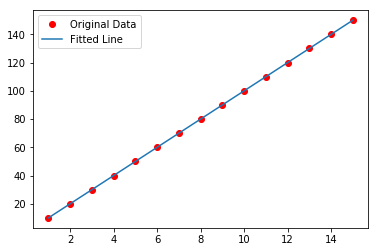

In [13]:
for epoch in range(total_epochs):
    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))
    
    if (epoch+1) % display_step == 0:
        print("Epoch: ", epoch+1, " Cost: {}".format(mean_square_error(linear_regression, train_X, train_Y)), 
              " W: ", W.numpy(), " b: ", b.numpy())
        
plt.plot(train_X, train_Y, "ro", label="Original Data")
plt.plot(train_X, np.array(W*train_X + b), label="Fitted Line")
plt.legend()
plt.show()